In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_output(folder: str):
  uncoloured = []
  lake_sizes = []
  lake_count = []
  
  #Generate all the data
  from os import listdir
  for path in listdir(folder):
    path = f"{folder}/{path}"
    data = np.genfromtxt(path, delimiter=',', dtype=int)
    uncoloured.append(data[:,0])
    lake_sizes.append(np.array(data[:,1:]))
    lake_count.append(np.array([len(water_lvl[np.where(water_lvl != 0)]) for water_lvl in data[:,1:]]))
    
  #Immediatly normalise stuff to cut down on bloat
  uncoloured = uncoloured / np.max(uncoloured)
  lake_count = lake_count / np.max(lake_count)
    
  return (np.array(uncoloured), np.array(lake_count), lake_sizes)

uncol_ppv, n_lakes_ppv, lake_sizes_ppv = parse_output("/home/raulwolters/Documents/FRIGGsims_Results/PPV/")
uncol_ppp, n_lakes_ppp, lake_sizes_ppp = parse_output("/home/raulwolters/Documents/FRIGGsims_Results/PPP/")

In [3]:
def px_per_waterlevel(px_sizes: np.ndarray | int, raw):
  per_wlvl = [[] for _  in range(254)]
  sized_lakes = px_sizes * raw if type(px_sizes) is int else [x * y for x, y in zip(raw, px_sizes)] 
  for depth in sized_lakes:
    for wlvl, lakes_wlvl in enumerate(depth):
      if len(lakes_wlvl) != 0: per_wlvl[wlvl].append(lakes_wlvl)
  return [np.concatenate(li) for li in per_wlvl]

def px_per_depth(px_sizes, raw):
  sized_lakes = px_sizes * raw if type(px_sizes) is int else [x * y for x, y in zip(raw, px_sizes)]
  return [np.concatenate(li) for li in sized_lakes]

In [11]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib

#make histogram!
NUM_BINS = 100
IMG_SIZE = 512

def make_histogram(real_areas, xscale="log", yscale="linear", ymax=250):
  #set-up bins for the histogram
  bins = None #god I hate python
  if xscale == "linear":
    bins = np.linspace(1, IMG_SIZE**2, num=NUM_BINS)[1:]
  else:
    np.logspace(0, np.log10(IMG_SIZE**2), num=NUM_BINS)[1:]
    
  #set-up colour map
  cmap = matplotlib.cm.get_cmap('viridis')
  cols = None
  if isinstance(real_areas, list):
    cols = np.arange(0, len(real_areas))
  elif isinstance(real_areas, np.ndarray):
    cols = np.arange(0, real_areas.shape[1])
  else: return None 
  
  fig, ax = plt.subplots(figsize=(6,2))
  ax_divider = make_axes_locatable(ax)  
  ax.hist(real_areas, bins, color=cmap(cols), stacked=True)
  ax.set_xscale(xscale)
  ax.set_yscale(yscale)
  
  ax.set_xlabel(f"{xscale} binned lake size ($Px^2$)")
  ax.set_ylabel("count")
  ax.set_xlim(np.min(bins), np.max(bins))
  ax.set_ylim(top=ymax)
  
  #yticks
  ax.set_yticks(np.round(np.linspace(start=0, stop=ymax, num=5)))
  
  #colorbar
  cax = ax_divider.append_axes('top', size="10%", pad="0%")
  fig.colorbar(
    matplotlib.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(0, 254)),
    cax=cax,
    orientation='horizontal'
  )
  cax.xaxis.set_ticks_position('top')
  fig.show()

(2271, 254)


/tmp/ipykernel_40565/687785943.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


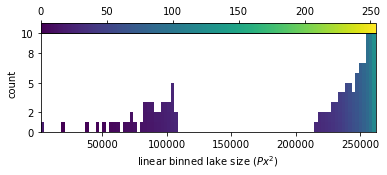

In [12]:
nl_lvl_1 = lake_sizes_ppv[12].transpose()
print(nl_lvl_1.shape)
make_histogram(nl_lvl_1, xscale='linear', ymax=10)

33


/tmp/ipykernel_40565/687785943.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


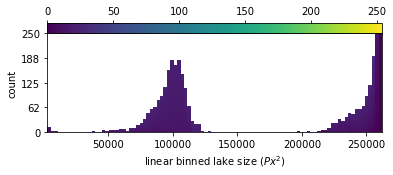

In [16]:
per_depth = px_per_depth(1, lake_sizes_ppv)
print(len(per_depth))
make_histogram(per_depth, xscale='linear')

/tmp/ipykernel_40565/687785943.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


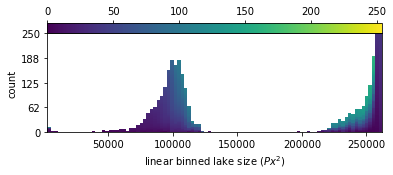

In [17]:
make_histogram(px_per_waterlevel(1 ,lake_sizes_ppv), xscale='linear')

/tmp/ipykernel_40565/687785943.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


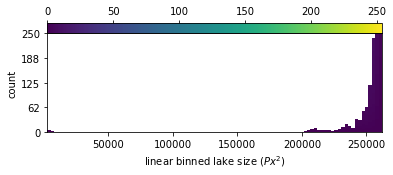

In [18]:
make_histogram(px_per_waterlevel(1, lake_sizes_ppp), xscale='linear')